In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Сгенерируем выборку из экспоненциального распределения с параметрами по умолчанию

In [2]:
sample_size = 1000
exp_rv = sts.expon()
exp_x = exp_rv.rvs(size=sample_size)

Построим график плотности распределения и гистограмму выборки

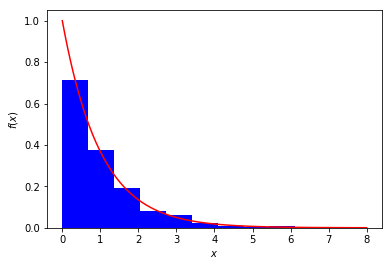

In [3]:
x = np.linspace(0, 8, 350)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, 'r')
plt.hist(exp_x, color='b', normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show();

Оценим распределение выборочного среднего случайной величины при объемах выборки: 5, 10, 50. 

In [4]:
samples_size = [5, 10, 50]
samples_mean = np.zeros((len(samples_size), sample_size))
for i, size in enumerate(samples_size):
    for j in range(0, sample_size):
        samples_mean[i, j] = sts.expon().rvs(size).mean()

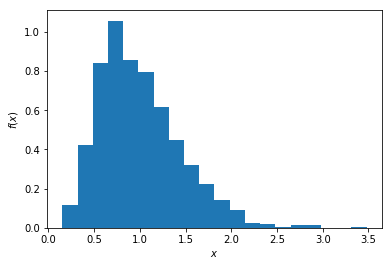

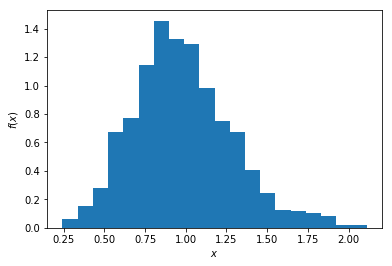

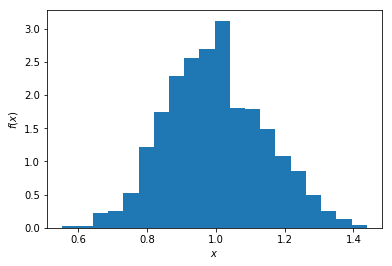

In [5]:
for i, size in enumerate(samples_size):
    plt.hist(samples_mean[i], bins=20, normed=True, label="n=" + str(size))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show();

Посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Так как lambda у нас равен 1, то матожидание и дисперсия равны 1. Таким образом, распределение выборочных средних данного распределения будет приближаться нормальным распределением с матожиданием 1 и дисперсией 1/n.

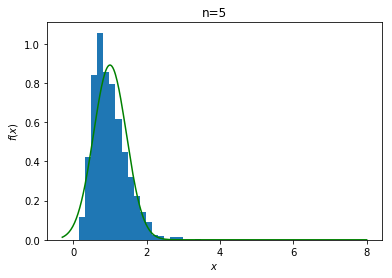

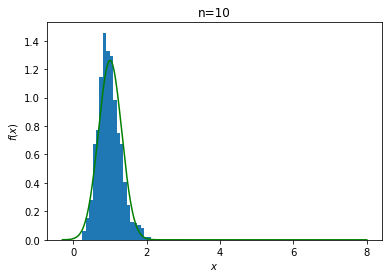

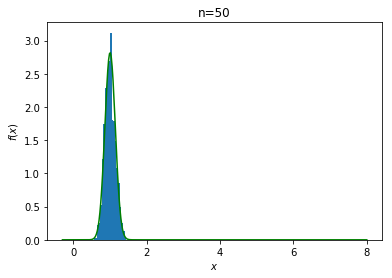

In [6]:
for i, size in enumerate(samples_size):
    norm_rv = sts.norm(1, (1. / size)**0.5)
    x = np.linspace(-0.3, 8, 350)
    plt.plot(x, norm_rv.pdf(x), color='g')
    plt.hist(samples_mean[i], bins=20, normed=True)
    plt.title(f"n={size}")
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show();

При малой объеме выборки распределение выборочных средних несимметрично, при увеличении объема выборки распределение описывается нормальным.